In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan=pd.read_csv('loan_prediction.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df=pd.DataFrame(data=loan)
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


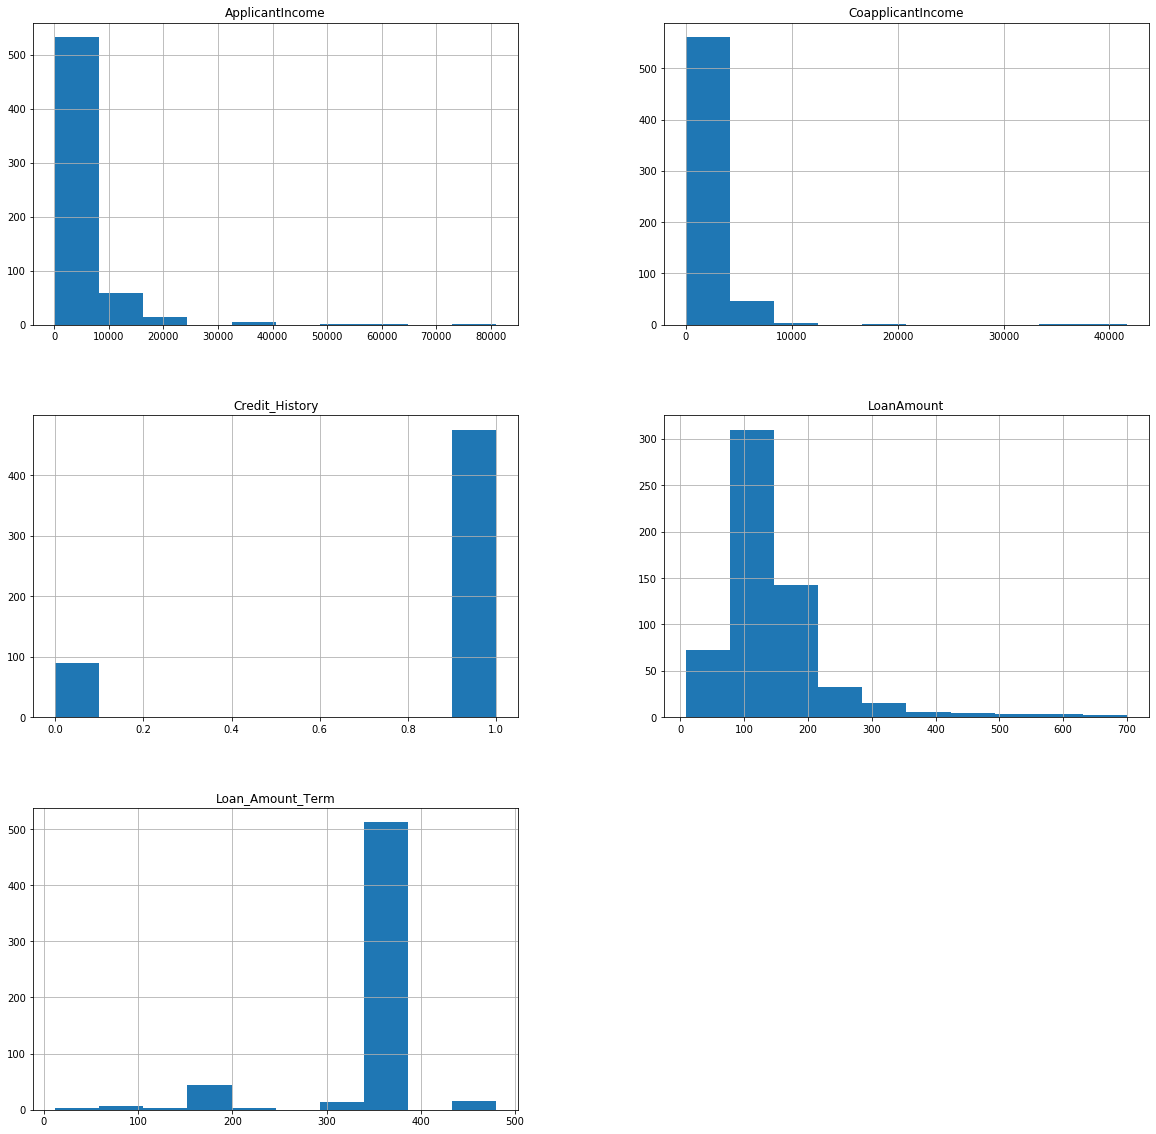

In [4]:
df.hist(figsize=(20,20))
plt.show()

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x251c1a21a88>,
 'caps': [<matplotlib.lines.Line2D at 0x251c1a27a08>,
 'boxes': [<matplotlib.lines.Line2D at 0x251c22dafc8>],
 'medians': [<matplotlib.lines.Line2D at 0x251c1a2b988>],
 'fliers': [<matplotlib.lines.Line2D at 0x251c1a2bac8>],
 'means': []}

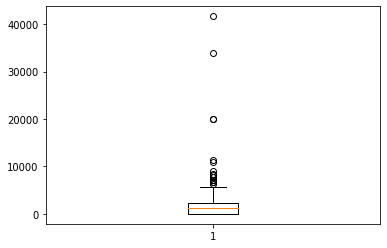

In [6]:
plt.boxplot(df['CoapplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x251c19cfac8>,
 'caps': [<matplotlib.lines.Line2D at 0x251c1942648>,
 'boxes': [<matplotlib.lines.Line2D at 0x251c19cf388>],
 'medians': [<matplotlib.lines.Line2D at 0x251c2262188>],
 'fliers': [<matplotlib.lines.Line2D at 0x251c19cdb88>],
 'means': []}

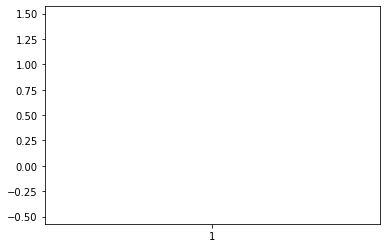

In [7]:
plt.boxplot(df['Credit_History'])

In [6]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.shape

(614, 13)

In [9]:
df.dropna(axis=0,how='any',inplace=True)

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.shape

(480, 13)

{'whiskers': [<matplotlib.lines.Line2D at 0x133bba59488>,
 'caps': [<matplotlib.lines.Line2D at 0x133bba59d48>,
 'boxes': [<matplotlib.lines.Line2D at 0x133bba55948>],
 'medians': [<matplotlib.lines.Line2D at 0x133bba5ccc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x133bba60b48>],
 'means': []}

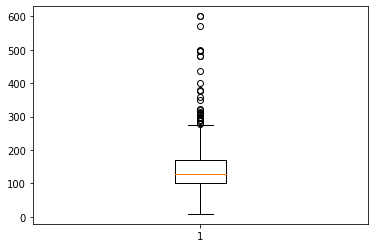

In [12]:
plt.boxplot(df['LoanAmount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x133bb9d3a08>,
 'caps': [<matplotlib.lines.Line2D at 0x133bb9de088>,
 'boxes': [<matplotlib.lines.Line2D at 0x133bb9d3f08>],
 'medians': [<matplotlib.lines.Line2D at 0x133bb822888>],
 'fliers': [<matplotlib.lines.Line2D at 0x133bb892288>],
 'means': []}

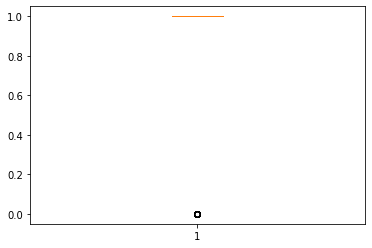

In [13]:
plt.boxplot(df['Credit_History'])

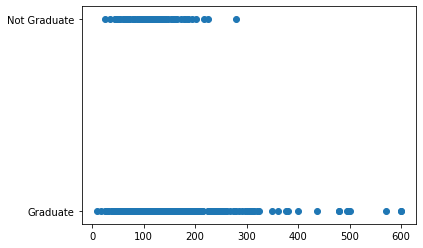

In [16]:
plt.scatter('LoanAmount','Education',data=df)

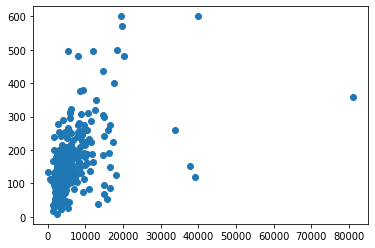

In [17]:
plt.scatter('ApplicantIncome','LoanAmount',data=df)

In [18]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

{'bodies': [<matplotlib.collections.PolyCollection at 0x251c1796548>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x251c1a97488>,
 'cmins': <matplotlib.collections.LineCollection at 0x251c1796dc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x251c1989b08>}

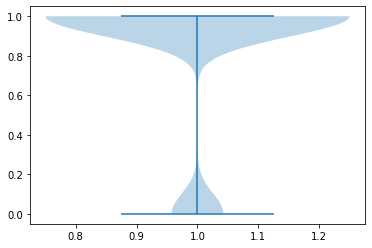

In [19]:
plt.violinplot(df['Credit_History'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x251c17d7ec8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x251c1796288>,
 'cmins': <matplotlib.collections.LineCollection at 0x251c1824f48>,
 'cbars': <matplotlib.collections.LineCollection at 0x251c1824ec8>}

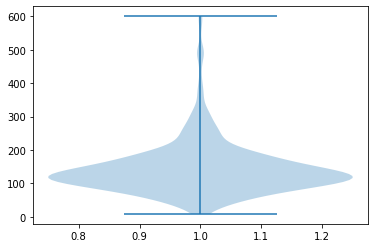

In [20]:
plt.violinplot(df['LoanAmount'])

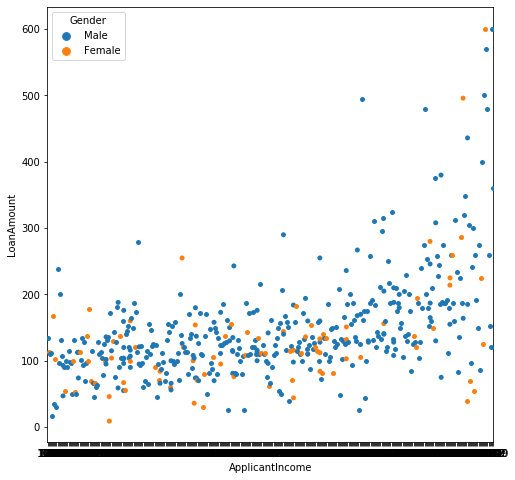

In [21]:
plt.figure(figsize=(8,8))
sns.stripplot('ApplicantIncome','LoanAmount',hue='Gender',data=df)

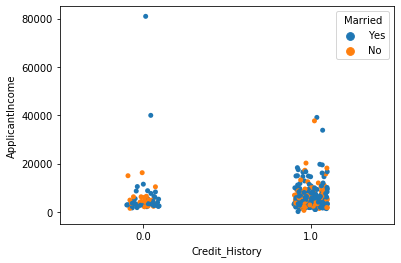

In [22]:
sns.stripplot('Credit_History','ApplicantIncome',hue='Married',data=df,edgecolor='gray')

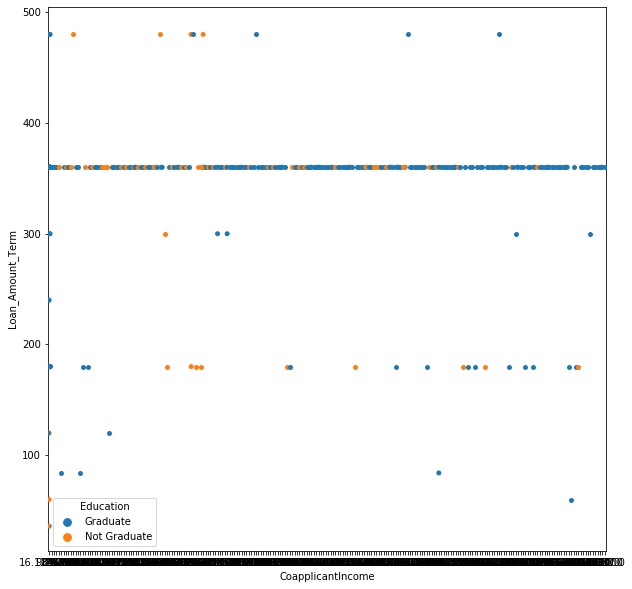

In [23]:
plt.figure(figsize=(10,10))
sns.swarmplot('CoapplicantIncome','Loan_Amount_Term',hue='Education',data=df)

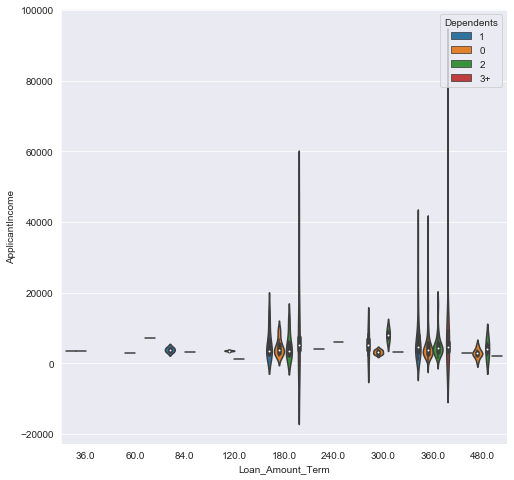

In [24]:
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
sns.violinplot('Loan_Amount_Term','ApplicantIncome',hue='Dependents',data=df)

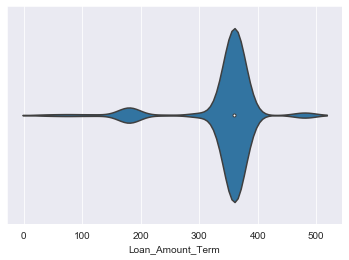

In [25]:
sns.violinplot(df['Loan_Amount_Term'])

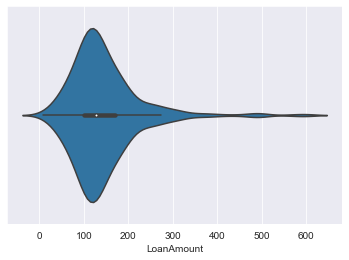

In [26]:
sns.violinplot(df['LoanAmount'])

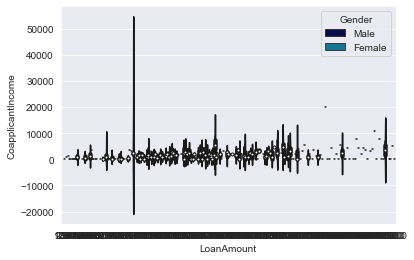

In [27]:
sns.violinplot('LoanAmount','CoapplicantIncome',hue='Gender',data=df,palette='ocean')

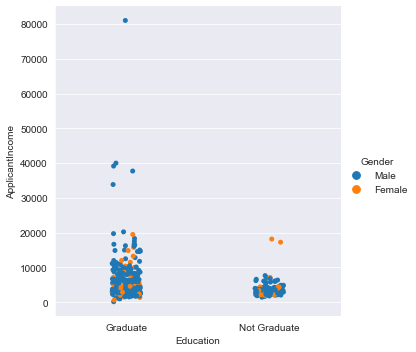

In [28]:
sns.catplot('Education','ApplicantIncome',hue='Gender',data=df)

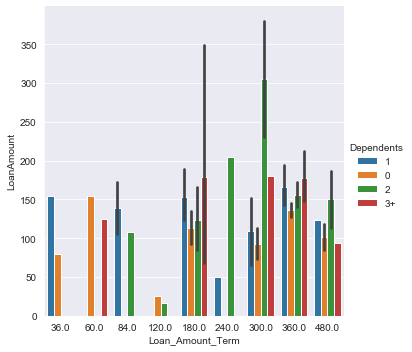

In [29]:
sns.catplot('Loan_Amount_Term','LoanAmount',hue='Dependents',data=df,kind='bar')

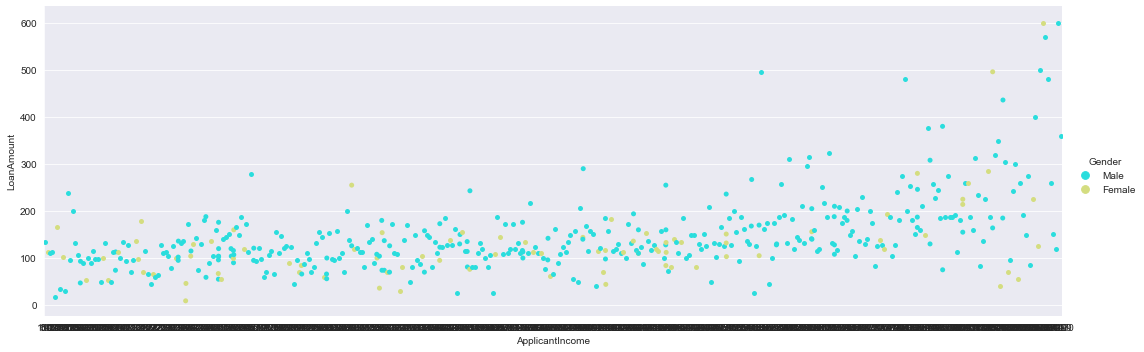

In [32]:
sns.catplot('ApplicantIncome','LoanAmount',hue='Gender',aspect=3,data=df,kind='strip',palette='rainbow')

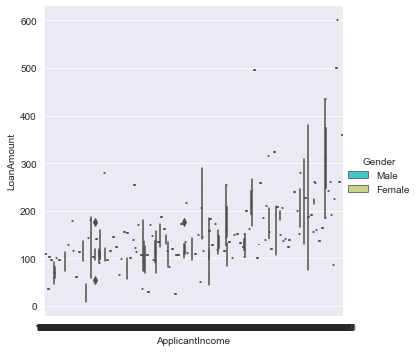

In [31]:
sns.catplot('ApplicantIncome','LoanAmount',hue='Gender',data=df,kind='box',palette='rainbow')

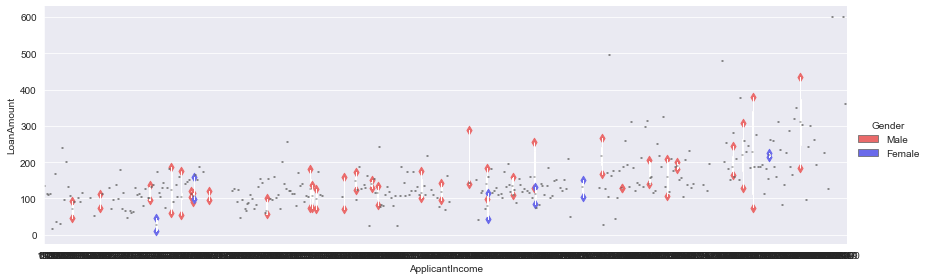

In [33]:
sns.catplot('ApplicantIncome','LoanAmount',hue='Gender',height=4,aspect=3,data=df,kind='boxen',palette='seismic_r')

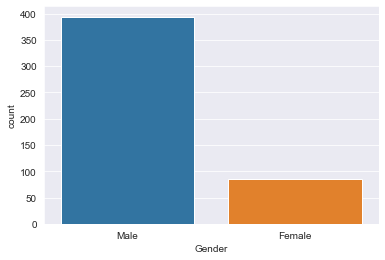

In [50]:
sns.countplot(df['Gender'])

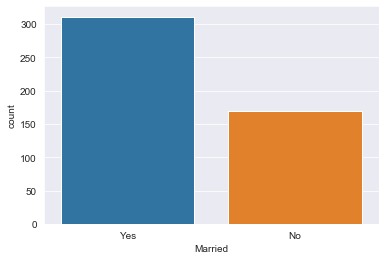

In [52]:
sns.countplot(df['Married'])

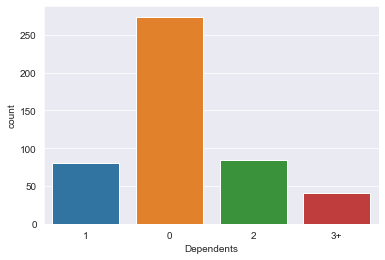

In [53]:
sns.countplot(df['Dependents'])

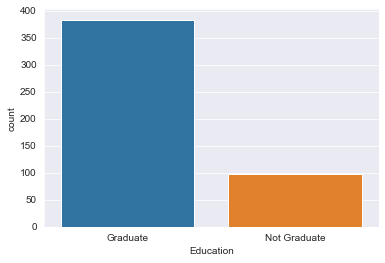

In [54]:
sns.countplot(df['Education'])

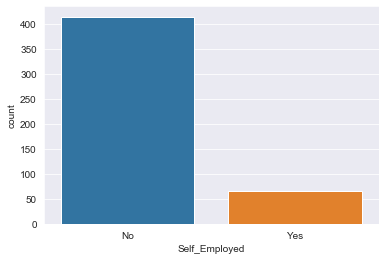

In [55]:
sns.countplot(df['Self_Employed'])

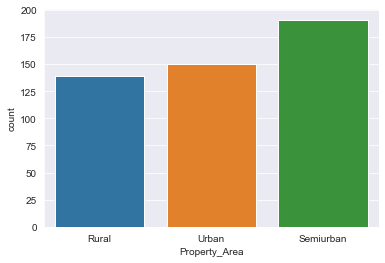

In [56]:
sns.countplot(df['Property_Area'])

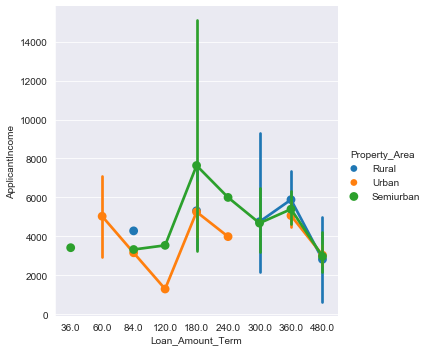

In [58]:
sns.catplot('Loan_Amount_Term','ApplicantIncome',hue='Property_Area',data=df,kind='point')

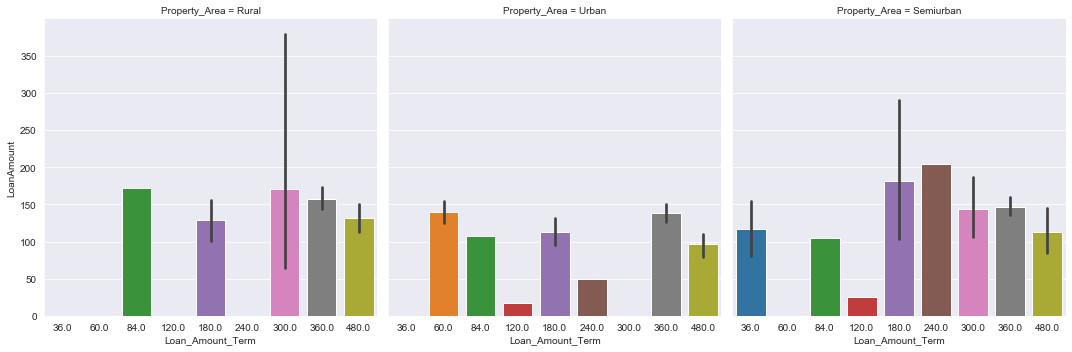

In [59]:
sns.catplot('Loan_Amount_Term','LoanAmount',col='Property_Area',data=df,kind='bar')

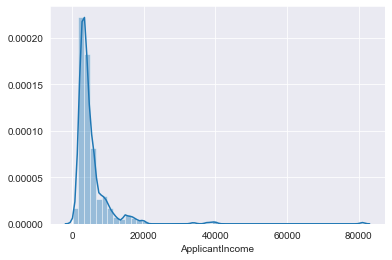

In [60]:
sns.distplot(df['ApplicantIncome'])

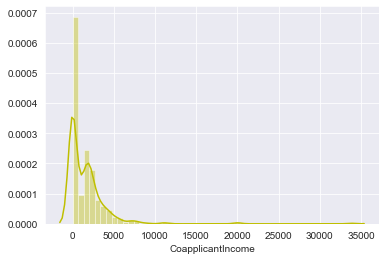

In [61]:
sns.distplot(df['CoapplicantIncome'],color='y')

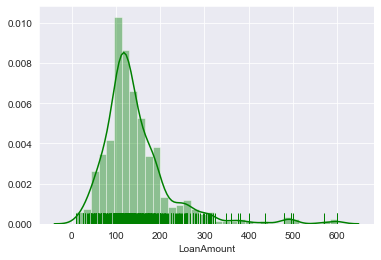

In [62]:
sns.distplot(df['LoanAmount'],rug=True,color='g')

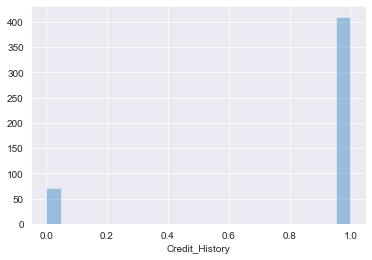

In [63]:
sns.distplot(df['Credit_History'],kde=False)

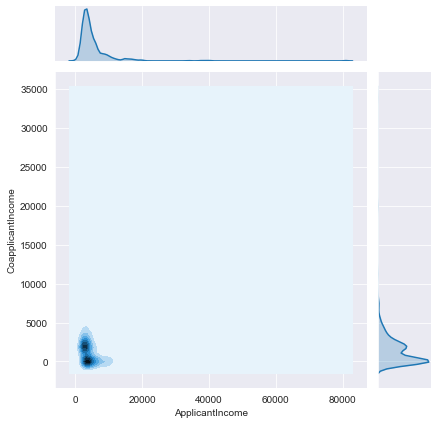

In [64]:
sns.jointplot('ApplicantIncome','CoapplicantIncome',data=df,kind='kde')

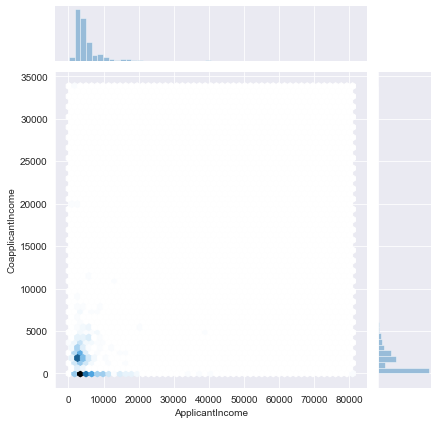

In [34]:
sns.jointplot('ApplicantIncome','CoapplicantIncome',data=df,kind='hex')

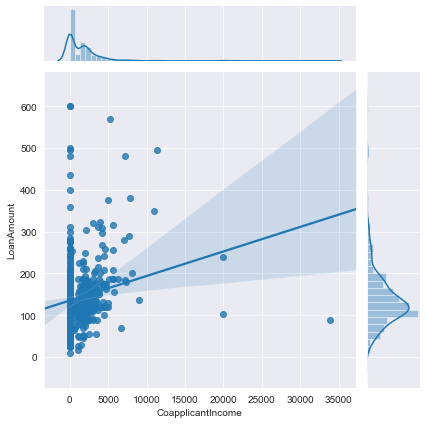

In [36]:
sns.jointplot('CoapplicantIncome','LoanAmount',data=df,height=6,ratio=5,space=.2,kind='reg')

In [20]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['ApplicantIncome'], dtype='object'),
 dtype('float64'): Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History'],
       dtype='object'),
 dtype('O'): Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area', 'Loan_Status'],
       dtype='object')}

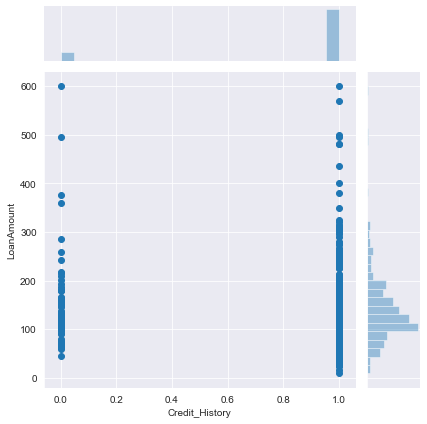

In [37]:
sns.jointplot('Credit_History','LoanAmount',data=df,height=6,ratio=5,space=.2,kind='scatter')

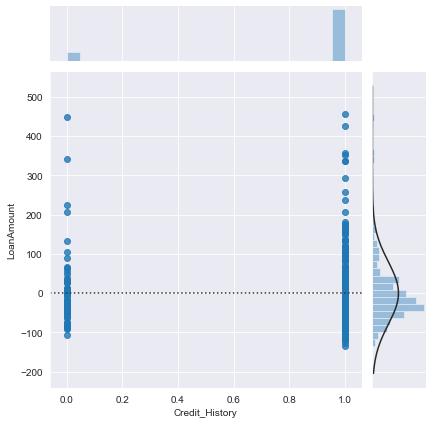

In [39]:
sns.jointplot('Credit_History','LoanAmount',data=df,height=6,ratio=5,space=.2,kind='resid')

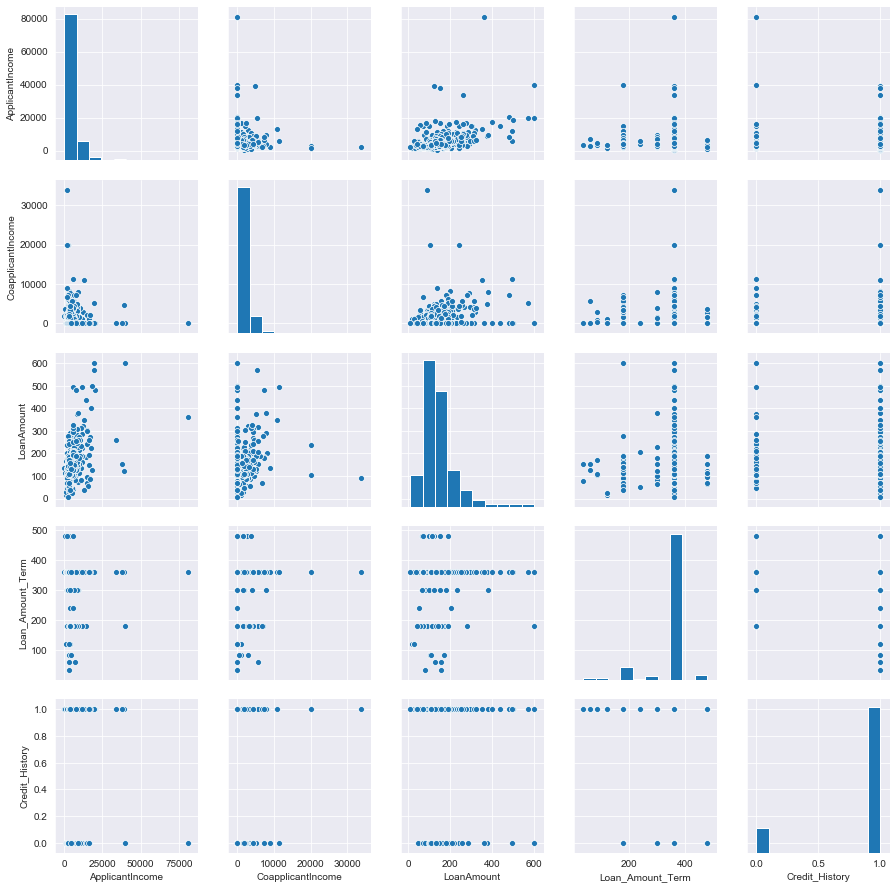

In [40]:
sns.pairplot(df)

In [14]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


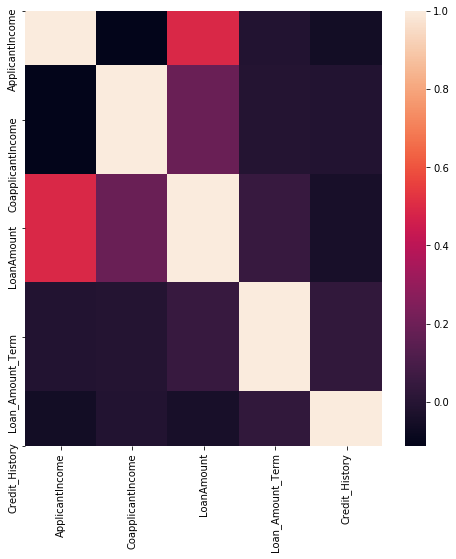

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

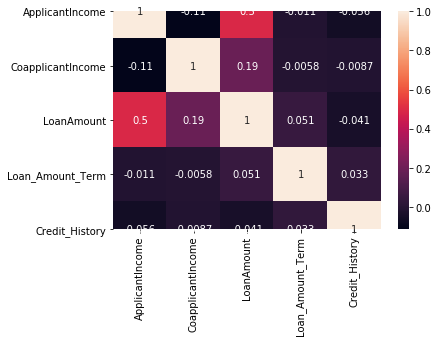

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
df.shape

(480, 13)

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [19]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['ApplicantIncome'], dtype='object'),
 dtype('float64'): Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History'],
       dtype='object'),
 dtype('O'): Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area', 'Loan_Status'],
       dtype='object')}

In [20]:
gen=pd.get_dummies(df['Gender'],drop_first=True,prefix='Gender')
married=pd.get_dummies(df['Married'],drop_first=True,prefix='Married')
depen=pd.get_dummies(df['Dependents'],drop_first=True,prefix='Dependents')
edu=pd.get_dummies(df['Education'],drop_first=True,prefix='Education')
self=pd.get_dummies(df['Self_Employed'],drop_first=True,prefix='Self_Employed')
area=pd.get_dummies(df['Property_Area'],drop_first=True,prefix='Property_Area')

In [21]:
df.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis=1,inplace=True)

In [22]:
for i in [gen,married,depen,edu,self,area]:
    df=pd.concat([df,i],axis=1)

In [23]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,N,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,Y,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,Y,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,Y,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,Y,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,Y,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,Y,1,1,0,1,0,0,0,0,1


In [24]:
x=df.drop('Loan_Status',axis=1)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1


In [25]:
y=df['Loan_Status']
y

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()

In [28]:
y=le.fit_transform(y)
y

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [29]:
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),MultinomialNB()]

In [30]:
max_acc_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=r_state)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accu_values=accuracy_score(y_test,predm)
        print('Accuracy score corresponing to random state',r_state,'is:',accu_values)
        if accu_values>max_acc_score:
            max_acc_score=accu_values
            final_state=r_state
            final_model=m
print()
print()
print()
print()
print()
print('Maximum Accuracy score correspond to random state',final_state,'is',max_acc_score,'and models is',final_model)

Accuracy score corresponing to random state 40 is: 0.8275862068965517
Accuracy score corresponing to random state 40 is: 0.7672413793103449
Accuracy score corresponing to random state 40 is: 0.6637931034482759
Accuracy score corresponing to random state 40 is: 0.8362068965517241
Accuracy score corresponing to random state 40 is: 0.5344827586206896
Accuracy score corresponing to random state 41 is: 0.8620689655172413
Accuracy score corresponing to random state 41 is: 0.7672413793103449
Accuracy score corresponing to random state 41 is: 0.6810344827586207
Accuracy score corresponing to random state 41 is: 0.8103448275862069
Accuracy score corresponing to random state 41 is: 0.5775862068965517
Accuracy score corresponing to random state 42 is: 0.8103448275862069
Accuracy score corresponing to random state 42 is: 0.6379310344827587
Accuracy score corresponing to random state 42 is: 0.6206896551724138
Accuracy score corresponing to random state 42 is: 0.7413793103448276
Accuracy score corre

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=44)

In [32]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8793103448275862
[[15 12]
 [ 2 87]]
              precision    recall  f1-score   support

           0       0.88      0.56      0.68        27
           1       0.88      0.98      0.93        89

    accuracy                           0.88       116
   macro avg       0.88      0.77      0.80       116
weighted avg       0.88      0.88      0.87       116



In [33]:
 from sklearn.model_selection import GridSearchCV

In [39]:
para_grid={'C':[1,2,5,8,10]}
lg=LogisticRegression()
grid=GridSearchCV(estimator=lg,param_grid=para_grid)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 2, 5, 8, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8020833333333334
{'C': 2}


In [40]:
lg=LogisticRegression(C=2)
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8793103448275862
[[15 12]
 [ 2 87]]
              precision    recall  f1-score   support

           0       0.88      0.56      0.68        27
           1       0.88      0.98      0.93        89

    accuracy                           0.88       116
   macro avg       0.88      0.77      0.80       116
weighted avg       0.88      0.88      0.87       116



In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80412371 0.78350515 0.77083333 0.86315789 0.77894737]
0.8001134924941219
0.03338217465773349


In [43]:
from sklearn.externals import joblib

In [44]:
joblib.dump(lg,'LoanStatusFile.obj')

['LoanStatusFile.obj']